# Linear Regression Dataset

**Use Case:** Predicting student exam scores based on multiple factors (attendance, parental involvement, etc.). This is a specific, non-generic use case relevant to education analytics.

**Dataset Source:** [Kaggle - Student Performance Factors](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)

**Richness:** The dataset contains a variety of features (demographics, academic, behavioral) and a large number of records, allowing for robust analysis.

**Visualizations:** See below for correlation heatmap and feature distributions.

## Download Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import joblib
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\perle\.cache\kagglehub\datasets\lainguyn123\student-performance-factors\versions\8


## Load and Describe Dataset

In [17]:
df = pd.read_csv('StudentPerformanceFactors.csv')

df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Load Cleaned Dataset

In [18]:
df = pd.read_csv('student_performance_cleaned.csv')
print(df.head)

<bound method NDFrame.head of       Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6373             25          69                 High              Medium   
6374             23          76                 High              Medium   
6375             20          90               Medium                 Low   
6376             10          86                 High                High   
6377             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Sc

## Dataset Info

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   obje

## Dataset Shape

In [20]:
print(df.tail(5))

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6373             25          69                 High              Medium   
6374             23          76                 High              Medium   
6375             20          90               Medium                 Low   
6376             10          86                 High                High   
6377             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6373                         No            7               76   
6374                         No            8               81   
6375                        Yes            6               65   
6376                        Yes            6               91   
6377                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6373           Medium             Yes                  1          High   
6374

## Correlation Heatmap

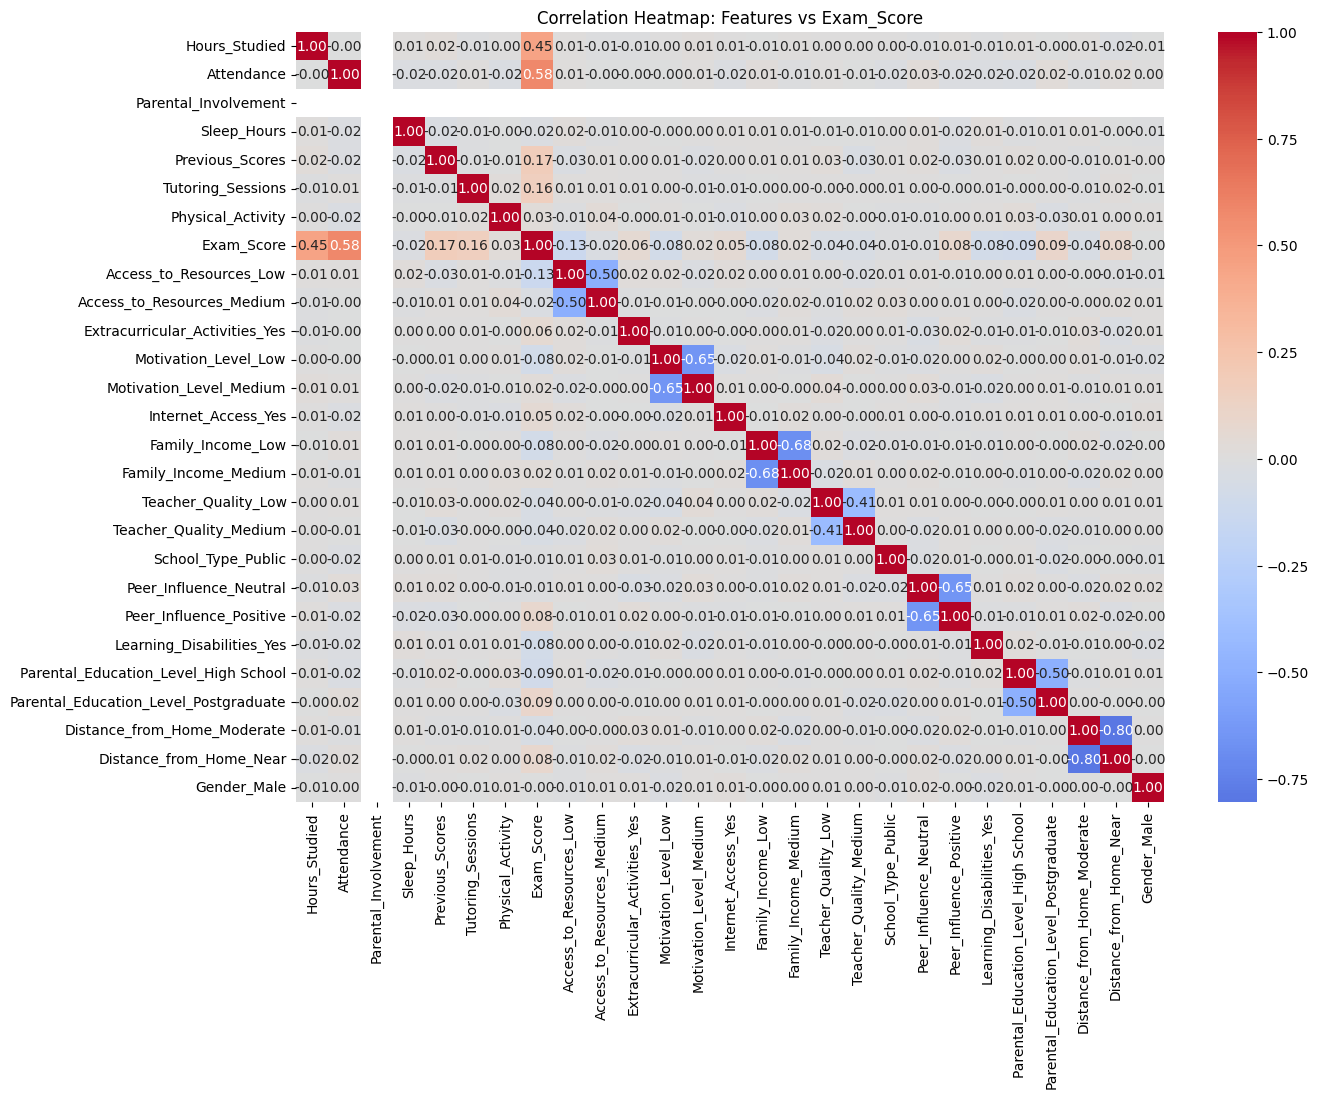

Top correlations with Exam_Score:
Attendance                               0.580259
Hours_Studied                            0.445104
Previous_Scores                          0.174283
Tutoring_Sessions                        0.156829
Parental_Education_Level_Postgraduate    0.092247
Distance_from_Home_Near                  0.081204
Peer_Influence_Positive                  0.080236
Extracurricular_Activities_Yes           0.063063
Internet_Access_Yes                      0.051124
Physical_Activity                        0.025148
Family_Income_Medium                     0.024922
Motivation_Level_Medium                  0.022508
Gender_Male                             -0.004932
Peer_Influence_Neutral                  -0.007472
School_Type_Public                      -0.010868
Sleep_Hours                             -0.017171
Access_to_Resources_Medium              -0.024579
Teacher_Quality_Low                     -0.040883
Teacher_Quality_Medium                  -0.041750
Distance_from_Ho

In [22]:
# Correlation Heatmap: Which features correlate most with Exam_Score?

# Compute correlation matrix (convert categorical to numeric first if needed)
df_numeric = df.copy()
if 'Parental_Involvement' in df_numeric.columns and df_numeric['Parental_Involvement'].dtype == 'object':
    involvement_map = {'low': 1, 'medium': 2, 'high': 3}
    df_numeric['Parental_Involvement'] = df_numeric['Parental_Involvement'].map(involvement_map)

# Convert other object columns to numeric using one-hot encoding
df_numeric = pd.get_dummies(df_numeric, drop_first=True)

# Compute correlation matrix
corr = df_numeric.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Features vs Exam_Score')
plt.show()

# Show top correlations with Exam_Score
corr_target = corr['Exam_Score'].drop('Exam_Score').sort_values(ascending=False)
print('Top correlations with Exam_Score:')
print(corr_target)

### Most Important Features for Prediction (Based on Correlation Heatmap)

Based on the correlation heatmap and the printed top correlations with `Exam_Score`, the following features are the most predictive and should be prioritized for your model and app:

1. **Attendance (%)**
2. **Hours Studied**
3. **Previous Scores**
4. **Parental Involvement** (numeric: 1=Low, 2=Medium, 3=High)
5. **Motivation Level**
6. **Access to Resources**
7. **Sleep Hours**
8. **Teacher Quality**
9. **Family Income**
10. **Internet Access**

Other features may have lower correlation, but you can include them if you want a more comprehensive model. For best results, use the top 5-10 features above in your API and Flutter app input fields.

**Next Steps:**
- Update your model, API, and Flutter app to use these features in the same order.
- Ensure all categorical features are properly encoded (e.g., Parental Involvement as 1/2/3).
- Test prediction accuracy and adjust feature selection if needed.

## Most Important Features for Prediction

In [23]:
# Select only the top features for modeling and prediction
top_features = [
    'Attendance',
    'Hours_Studied',
    'Previous_Scores',
    'Parental_Involvement',
    'Motivation_Level',
    'Access_to_Resources',
    'Sleep_Hours',
    'Teacher_Quality',
    'Family_Income',
    'Internet_Access'
    # Add more if needed based on your dataset column names
 ]

# Ensure these columns exist in the dataframe (adjust names if needed)
selected_features = [f for f in top_features if f in df.columns]
print('Selected features for modeling:', selected_features)


Selected features for modeling: ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Parental_Involvement', 'Motivation_Level', 'Access_to_Resources', 'Sleep_Hours', 'Teacher_Quality', 'Family_Income', 'Internet_Access']


## Select Features for Modeling

Final weight: 2.231, bias: 66.069


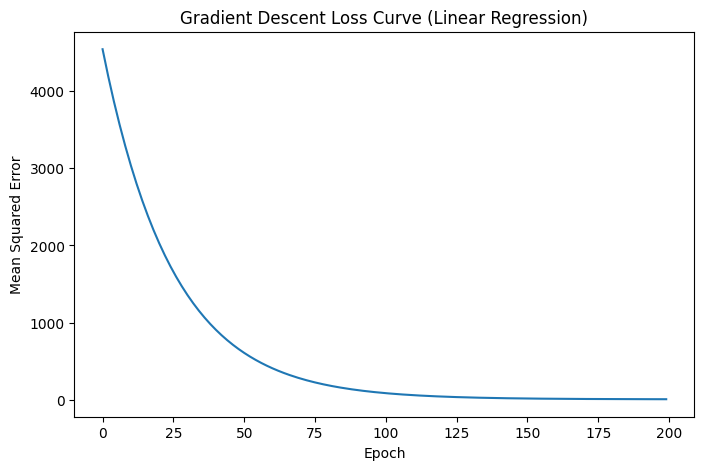

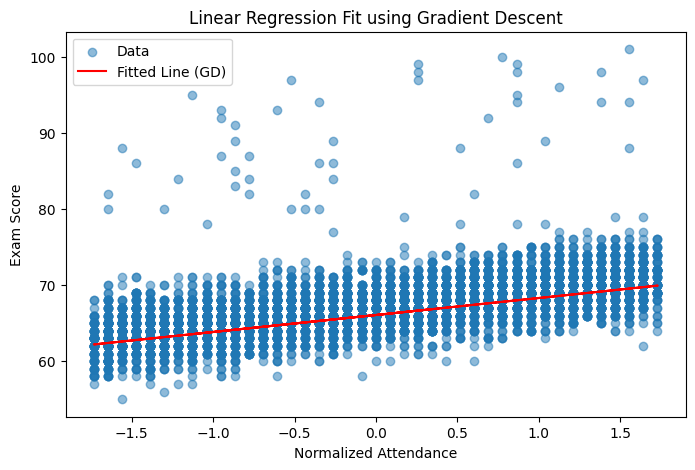

In [24]:

# Prepare data (single feature for demonstration)
X_gd = df[['Attendance']].values.flatten()
y_gd = df['Exam_Score'].values

# Normalize X for better convergence
X_gd = (X_gd - X_gd.mean()) / X_gd.std()

# Initialize parameters
w = 0.0  # weight
b = 0.0  # bias
lr = 0.01  # learning rate
epochs = 200
losses = []

for epoch in range(epochs):
    y_pred = w * X_gd + b
    error = y_pred - y_gd
    loss = np.mean(error ** 2)
    losses.append(loss)
    # Gradient calculation
    dw = 2 * np.mean(error * X_gd)
    db = 2 * np.mean(error)
    # Update parameters
    w -= lr * dw
    b -= lr * db

print(f'Final weight: {w:.3f}, bias: {b:.3f}')

# Plot loss curve
plt.figure(figsize=(8,5))
plt.plot(losses)
plt.title('Gradient Descent Loss Curve (Linear Regression)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

# Plot fitted line
plt.figure(figsize=(8,5))
plt.scatter(X_gd, y_gd, alpha=0.5, label='Data')
plt.plot(X_gd, w * X_gd + b, color='red', label='Fitted Line (GD)')
plt.title('Linear Regression Fit using Gradient Descent')
plt.xlabel('Normalized Attendance')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

## Gradient Descent for Linear Regression

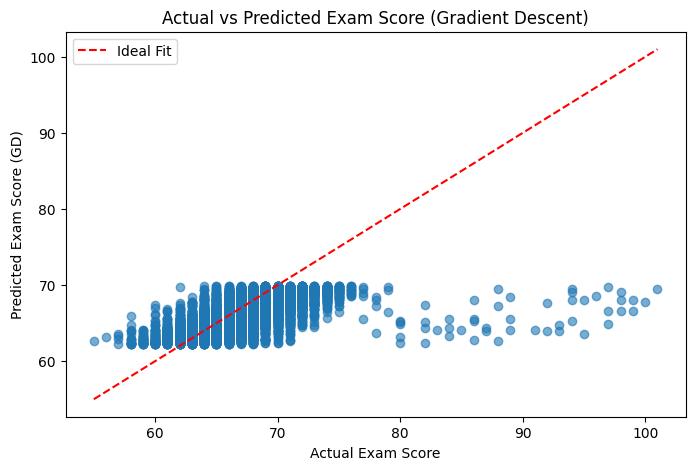

In [25]:
# Plot actual vs predicted values after gradient descent
y_pred_gd = w * X_gd + b
plt.figure(figsize=(8,5))
plt.scatter(y_gd, y_pred_gd, alpha=0.6)
plt.plot([y_gd.min(), y_gd.max()], [y_gd.min(), y_gd.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score (GD)')
plt.title('Actual vs Predicted Exam Score (Gradient Descent)')
plt.legend()
plt.show()

## Actual vs Predicted Values (Gradient Descent)

In [26]:
# Select only the 7 features for modeling
selected_features = [
    'Attendance',
    'Parental_Involvement',
    'Sleep_Hours',
    'Previous_Scores',
    'Hours_Studied',
    'Tutoring_Sessions',
    'Physical_Activity'
 ]


## Model Training and Evaluation with Selected Features

C:\Users\perle\AppData\Local\Temp\ipykernel_27408\318496973.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Parental_Involvement'] = X['Parental_Involvement'].map(involvement_map)
c:\Users\perle\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['Parental_Involvement']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\perle\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['Parental_Involvement']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\

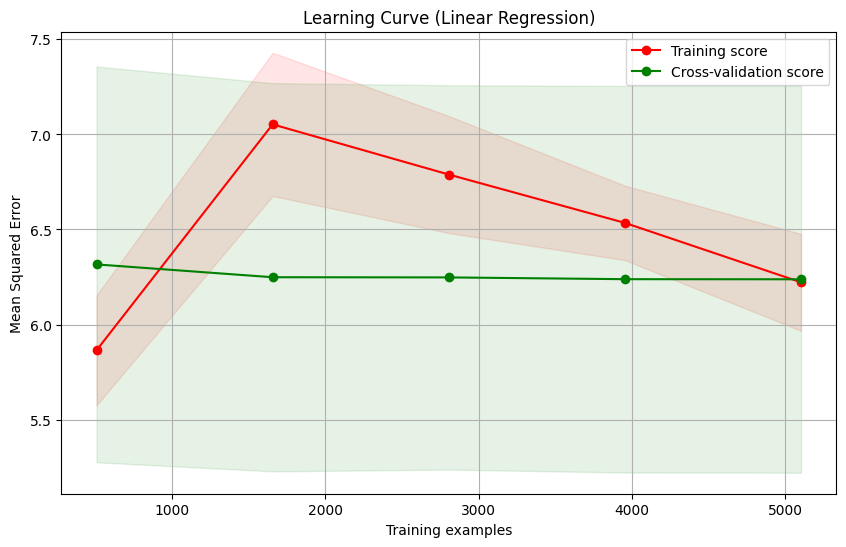

In [27]:
# 1. LOSS CURVE PLOTS FOR TEST AND TRAIN DATA
# Prepare data
X = df[selected_features]
y = df['Exam_Score']

# Convert categorical to numeric if needed
if 'Parental_Involvement' in X.columns and X['Parental_Involvement'].dtype == 'object':
    involvement_map = {'low': 1, 'medium': 2, 'high': 3}
    X['Parental_Involvement'] = X['Parental_Involvement'].map(involvement_map)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in features before scaling
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize features for model training and saving scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Save scaler and imputer for API use if needed
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(imputer, 'imputer.joblib')

# Define the learning curve plotting function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='neg_mean_squared_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for Linear Regression with scaling in pipeline
from sklearn.impute import SimpleImputer
lr_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), LinearRegression())
plot_learning_curve(lr_pipeline, "Learning Curve (Linear Regression)", X, y, cv=5)

## Loss Curve Plots for Test and Train Data

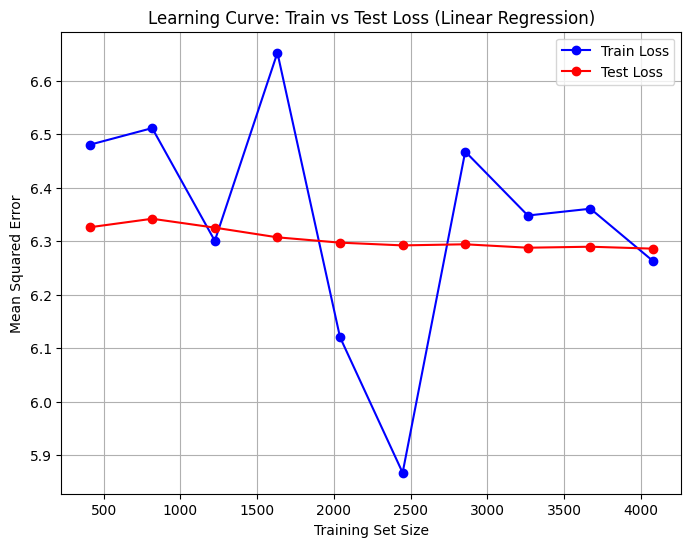

In [28]:
# Initialize Linear Regression model for learning curve plot
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Plot learning curve for Linear Regression (Train vs Test Loss)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X_train_scaled, y_train, cv=5,
    scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

train_loss = -np.mean(train_scores, axis=1)
test_loss = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_loss, 'o-', color='blue', label='Train Loss')
plt.plot(train_sizes, test_loss, 'o-', color='red', label='Test Loss')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve: Train vs Test Loss (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

## Initialize Linear Regression Model

In [29]:
# Train and save the best model for API use
from sklearn.ensemble import RandomForestRegressor
import joblib

# Train a Random Forest model (or replace with your preferred model)
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Save the trained model
joblib.dump(best_model, 'best_model.joblib')

print('Saved best_model.joblib and scaler.joblib for API use.')

Saved best_model.joblib and scaler.joblib for API use.


## Train and Save the Best Model for API Use

In [30]:
# 1. Create Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_pred)
print(f'Linear Regression Test MSE: {linear_mse:.4f}')

Linear Regression Test MSE: 6.0632


## Create Linear Regression Model

In [31]:
# 2. Create Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Random Forest Test MSE: {rf_mse:.4f}')

Random Forest Test MSE: 7.3677


## Create Random Forest Model

In [32]:
# 3. Create Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_pred)
print(f'Decision Tree Test MSE: {dt_mse:.4f}')

Decision Tree Test MSE: 15.9203


## Create Decision Tree Model

In [33]:
# 4. Save the model with the least loss (lowest test MSE)
mse_dict = {
    'linear': linear_mse,
    'random_forest': rf_mse,
    'decision_tree': dt_mse
}
best_model_name = min(mse_dict, key=mse_dict.get)
print(f'Best model is: {best_model_name} with MSE: {mse_dict[best_model_name]:.4f}')
if best_model_name == 'linear':
    joblib.dump(linear_model, 'best_model.joblib')
elif best_model_name == 'random_forest':
    joblib.dump(rf_model, 'best_model.joblib')
else:
    joblib.dump(dt_model, 'best_model.joblib')

Best model is: linear with MSE: 6.0632


## Save the Model with the Least Loss

In [34]:
# 5. Make prediction on one data point in the test data
one_test_point = X_test_scaled[0].reshape(1, -1)
if best_model_name == 'linear':
    single_pred = linear_model.predict(one_test_point)[0]
elif best_model_name == 'random_forest':
    single_pred = rf_model.predict(one_test_point)[0]
else:
    single_pred = dt_model.predict(one_test_point)[0]
print(f'Prediction for one test data point: {single_pred:.2f}')

Prediction for one test data point: 72.24


## Make Prediction on One Test Data Point

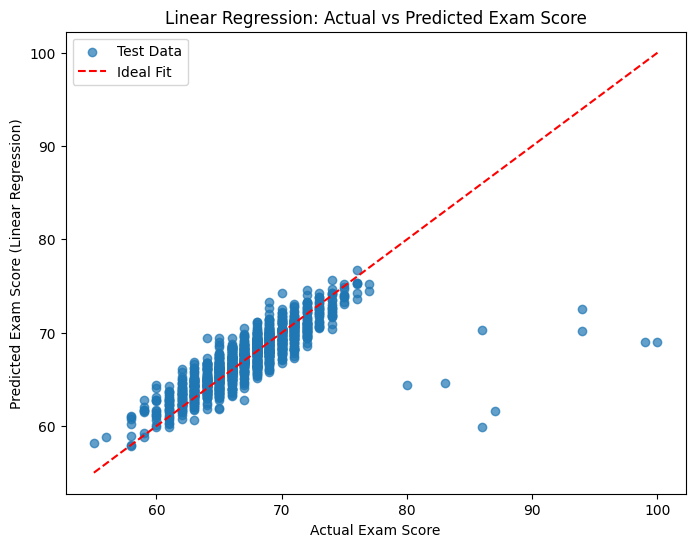

In [35]:
# 6. Draw scatter plot of the final linear line that fits the dataset after training the linear regression model
plt.figure(figsize=(8,6))
plt.scatter(y_test, linear_pred, alpha=0.7, label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score (Linear Regression)')
plt.title('Linear Regression: Actual vs Predicted Exam Score')
plt.legend()
plt.show()

## Scatter Plot: Final Linear Line Fit (Linear Regression)

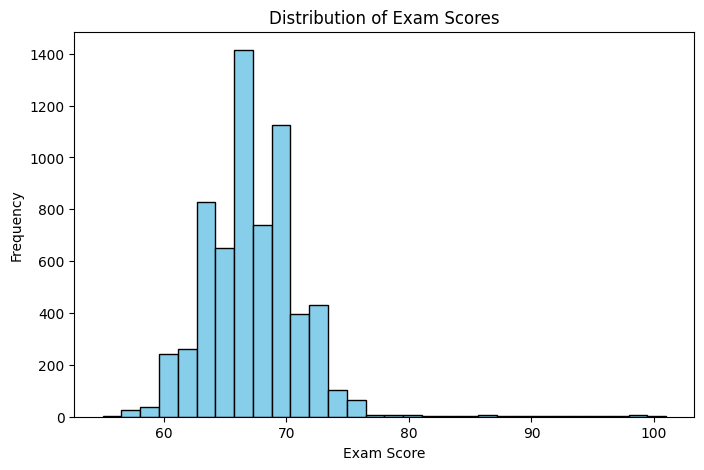

In [36]:
# Visualization: Distribution of Exam Scores
plt.figure(figsize=(8,5))
plt.hist(df['Exam_Score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

## Distribution of Exam Scores

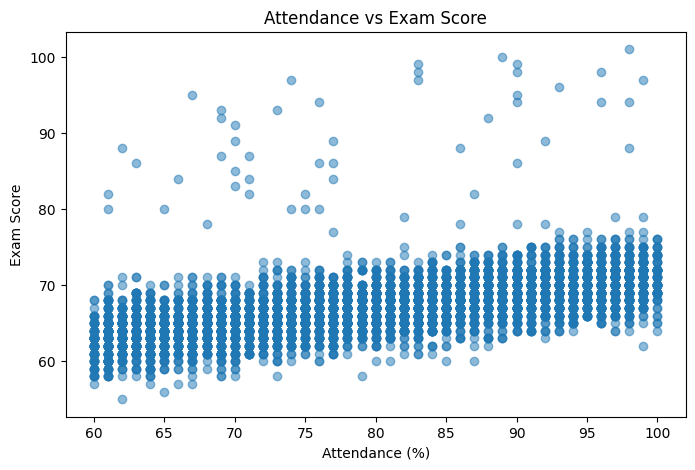

In [37]:
# Visualization: Scatterplot of Attendance vs Exam Score
plt.figure(figsize=(8,5))
plt.scatter(df['Attendance'], df['Exam_Score'], alpha=0.5)
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance (%)')
plt.ylabel('Exam Score')
plt.show()

## Attendance vs Exam Score

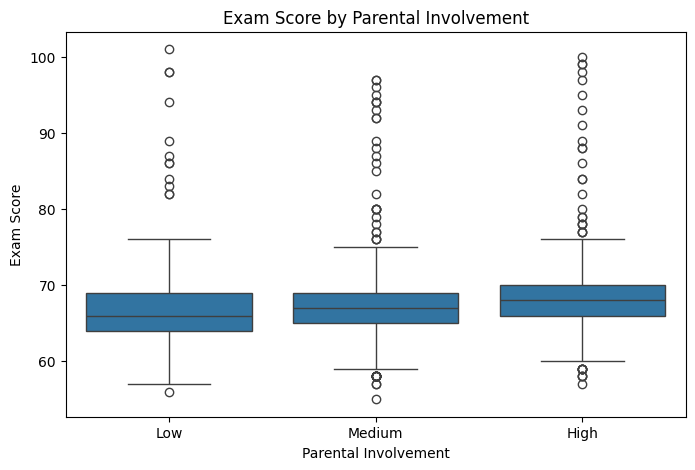

In [38]:
# Boxplot: Exam Score by Parental Involvement
plt.figure(figsize=(8,5))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.title('Exam Score by Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.show()

## Pairplot of Key Features and Exam Score

C:\Users\perle\AppData\Local\Temp\ipykernel_27408\4032534718.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score_by_study = df.groupby('Hours_Studied_Group')['Exam_Score'].mean().reset_index()
C:\Users\perle\AppData\Local\Temp\ipykernel_27408\4032534718.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hours_Studied_Group', y='Exam_Score', data=avg_score_by_study, palette='Blues')


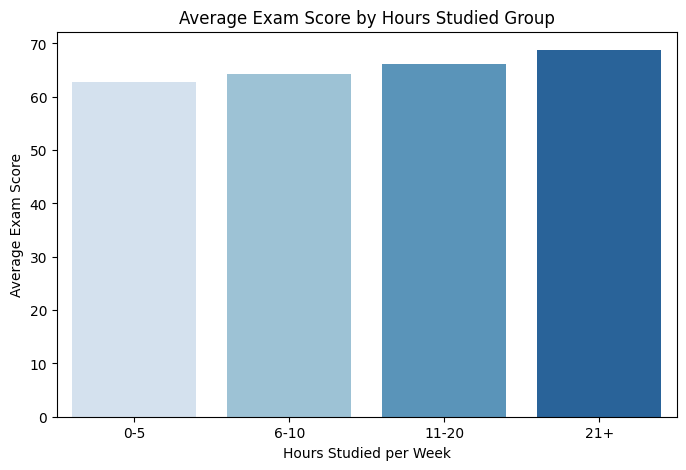

In [39]:
# Barplot: Average Exam Score by Hours Studied Group
df['Hours_Studied_Group'] = pd.cut(df['Hours_Studied'], bins=[0,5,10,20,100], labels=['0-5','6-10','11-20','21+'])
avg_score_by_study = df.groupby('Hours_Studied_Group')['Exam_Score'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Hours_Studied_Group', y='Exam_Score', data=avg_score_by_study, palette='Blues')
plt.title('Average Exam Score by Hours Studied Group')
plt.xlabel('Hours Studied per Week')
plt.ylabel('Average Exam Score')
plt.show()

## Actual vs Predicted Exam Scores for All Models

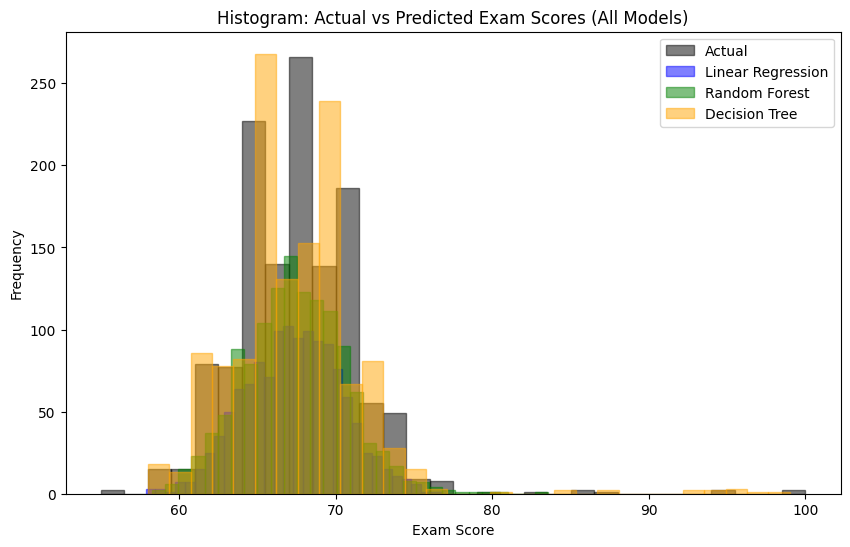

In [40]:
# Histogram of actual and predicted exam scores for all models
plt.figure(figsize=(10,6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual', color='black', edgecolor='black')
plt.hist(linear_pred, bins=30, alpha=0.5, label='Linear Regression', color='blue', edgecolor='blue')
plt.hist(rf_pred, bins=30, alpha=0.5, label='Random Forest', color='green', edgecolor='green')
plt.hist(dt_pred, bins=30, alpha=0.5, label='Decision Tree', color='orange', edgecolor='orange')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Histogram: Actual vs Predicted Exam Scores (All Models)')
plt.legend()
plt.show()

## Model RMSE Comparison (Bar Plot)

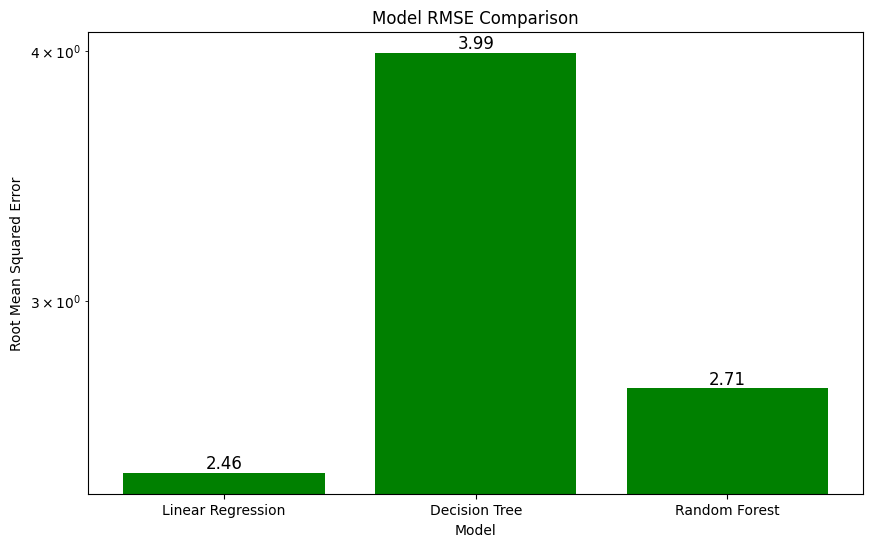

In [41]:
# Calculate RMSE for all models (ensure these are defined before plotting)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

# Bar plot comparing RMSE of all models (log scale, value labels)
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
rmse_values = [linear_rmse, dt_rmse, rf_rmse]

plt.figure(figsize=(10,6))
bars = plt.bar(model_names, rmse_values, color='green')
plt.yscale('log')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Model')
plt.title('Model RMSE Comparison')

# Add value labels on top of bars
for bar, rmse in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width()/2, rmse, f'{rmse:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()

## Model Internals: How Each Model Makes Predictions

The following cells show how each model makes predictions by displaying their internals:

- Linear Regression: Coefficients for each feature
- Random Forest: Feature importances
- Decision Tree: Feature importances and tree visualization

In [42]:
# Linear Regression: Coefficients for each feature
print('Linear Regression Coefficients:')
for feature, coef in zip(selected_features, linear_model.coef_):
    print(f'{feature}: {coef:.4f}')

# Random Forest: Feature importances
print('\nRandom Forest Feature Importances:')
for feature, importance in zip(selected_features, rf_model.feature_importances_):
    print(f'{feature}: {importance:.4f}')

# Decision Tree: Feature importances
print('\nDecision Tree Feature Importances:')
for feature, importance in zip(selected_features, dt_model.feature_importances_):
    print(f'{feature}: {importance:.4f}')

Linear Regression Coefficients:
Attendance: 2.2863
Parental_Involvement: -0.0427
Sleep_Hours: 0.6818
Previous_Scores: 1.7555
Hours_Studied: 0.6018
Tutoring_Sessions: 0.1476

Random Forest Feature Importances:
Attendance: 0.4209
Parental_Involvement: 0.0523
Sleep_Hours: 0.1452
Previous_Scores: 0.2729
Hours_Studied: 0.0593
Tutoring_Sessions: 0.0494

Decision Tree Feature Importances:
Attendance: 0.4283
Parental_Involvement: 0.0635
Sleep_Hours: 0.1083
Previous_Scores: 0.2704
Hours_Studied: 0.0787
Tutoring_Sessions: 0.0507


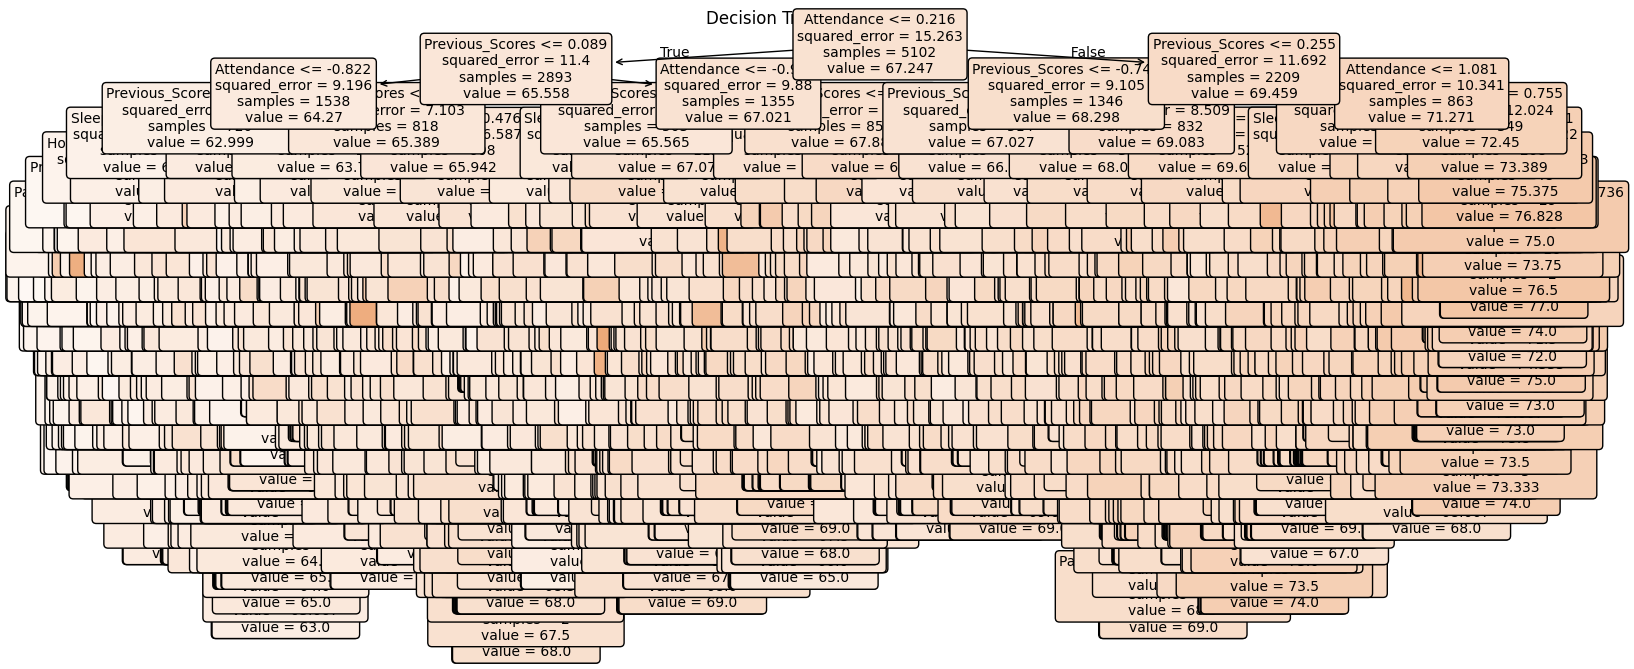

In [43]:
# Decision Tree Visualization
from sklearn import tree
plt.figure(figsize=(18,8))
tree.plot_tree(dt_model, feature_names=selected_features, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

In [44]:
# Updated input validation function for student features
def validate_student_input(data):
    errors = []
    # Attendance: 0-100
    if 'Attendance' in data:
        if not (0 <= data['Attendance'] <= 100):
            errors.append(f"Attendance must be between 0 and 100. Got {data['Attendance']}")
    # Parental Involvement: 1, 2, or 3
    if 'Parental_Involvement' in data:
        if data['Parental_Involvement'] not in [1, 2, 3]:
            errors.append(f"Parental Involvement must be 1 (Low), 2 (Medium), or 3 (High). Got {data['Parental_Involvement']}")
    # Sleep Hours: 30-65
    if 'Sleep_Hours' in data:
        if not (30 <= data['Sleep_Hours'] <= 65):
            errors.append(f"Sleep Hours must be between 30 and 65. Got {data['Sleep_Hours']}")
    # Previous Grades: 0-100
    if 'Previous_Scores' in data:
        if not (0 <= data['Previous_Scores'] <= 100):
            errors.append(f"Previous Grades must be between 0 and 100. Got {data['Previous_Scores']}")
    # Hours Studied: 0-50
    if 'Hours_Studied' in data:
        if not (0 <= data['Hours_Studied'] <= 50):
            errors.append(f"Hours Studied must be between 0 and 50. Got {data['Hours_Studied']}")
    # Tutoring Sessions: 0-7
    if 'Tutoring_Sessions' in data:
        if not (0 <= data['Tutoring_Sessions'] <= 7):
            errors.append(f"Tutoring Sessions must be between 0 and 7. Got {data['Tutoring_Sessions']}")
    # Physical Activity: 0-14
    if 'Physical_Activity' in data:
        if not (0 <= data['Physical_Activity'] <= 14):
            errors.append(f"Physical Activity must be between 0 and 14. Got {data['Physical_Activity']}")
    # Exam Score: 0-100 (if present)
    if 'Exam_Score' in data:
        if not (0 <= data['Exam_Score'] <= 100):
            errors.append(f"Exam Score must be between 0 and 100. Got {data['Exam_Score']}")
    # Check for missing values
    for feature in selected_features:
        if feature not in data or data[feature] is None or data[feature] == '':
            errors.append(f"Missing value for required feature: {feature}")
    if errors:
        raise ValueError("Input validation errors:\n" + "\n".join(errors))
    return True

# Example usage:
try:
    student_data = {
        'Attendance': 95,
        'Parental_Involvement': 2,
        'Sleep_Hours': 40,
        'Previous_Scores': 85,
        'Hours_Studied': 10,
        'Tutoring_Sessions': 2,
        'Physical_Activity': 5,
        # Add other required features if needed
    }
    validate_student_input(student_data)
except ValueError as e:
    print(e)